In [1]:
import numpy as np
#se pide el tamaño de la matriz
n=5
#se define una matriz de zeros de nxn
a=np.zeros(shape=(n,n))
#se define sigma (dev estandar)
sig=1

for u in range(0,n):
    for v in range(0,n):
        d1=(int(n/2)-u)
        d2=(int(n/2)-v)
        a[u,v]=(1/(2*np.pi*sig**2))*np.exp(-(d1**2+d2**2)/(2*sig**2))

In [2]:
with np.printoptions(threshold=np.inf):
    print(a)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


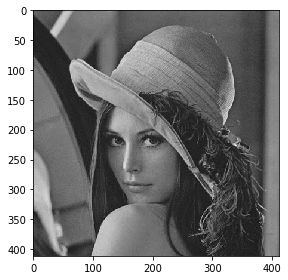

In [3]:
import cv2
import skimage as sk
from skimage import data, io, filters
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")
img = cv2.imread('lena.jpg',0)
# img=sk.io.imread('lena.jpg')
sk.io.imshow(img)

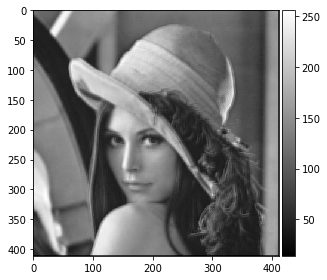

In [4]:
L=img.shape
x=L[0]
y=L[1]
smoth=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    smoth[j,i]=smoth[j,i]+a[d1,d2]*img[d1+j,d2+i]
maxi=np.amax(smoth)
for j in range(0,x):
    for i in range(0,y):
        smoth[j,i]=(smoth[j,i]/maxi)*256
sk.io.imshow(smoth, cmap="gray")

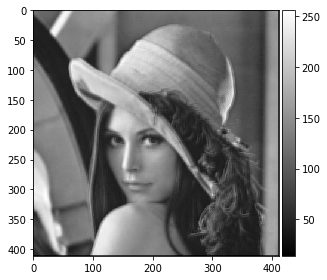

In [9]:
L=img.shape
#rescalada
x=int(L[0]/2)
y=int(L[1]/2)
escal=np.zeros(shape=(x,y))
unos=np.ones(shape=(3,3))
for j in range(0,x):
    for i in range(0,y):
        q=0
        for u in range(0,3):
            for v in range(0,3):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    escal[j,i]=escal[j,i]+unos[d1,d2]*smoth[d1+j,d2+i]
                    q=q+1
        if q>0:
            escal[j,i]=escal[j,i]/q    
maxi=np.amax(escal)
for j in range(0,x):
    for i in range(0,y):
        escal[j,i]=(escal[j,i]/maxi)*256
sk.io.imshow(escal, cmap="gray")

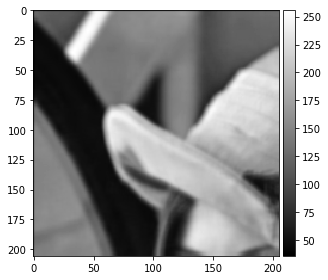